## 6.5 Unsupervised Machine Learning 

### The script contains:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering
#### 4. k-means clustering when no outliers
#### 5. Statistics

### 1. Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
path = r'C:\Users\Lenovo\AirBnB Analysis\02 Data\Prepared Data'

In [3]:
df = pd.read_pickle(os.path.join(path, 'AirBnB_series_maps.pkl'))

In [4]:
df.shape

(51707, 25)

In [5]:
df.columns

Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'City', 'WeekTime', 'satisfaction',
       'price', 'eu_country'],
      dtype='object')

In [6]:
# Renaming columns
df.rename(columns = {'realSum' : 'full_price', 'City': 'city', 'WeekTime': 'week_time', 'dist': 'distance_to_center', 'metro_dist': 'distance_to_metro', 'price' : 'price_level'}, inplace = True)

In [7]:
df.columns

Index(['Unnamed: 0', 'full_price', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms',
       'distance_to_center', 'distance_to_metro', 'attr_index',
       'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng', 'lat',
       'city', 'week_time', 'satisfaction', 'price_level', 'eu_country'],
      dtype='object')

In [8]:
# selecting necessary columns and putting them in a list called columns
columns = ["full_price","person_capacity", "cleanliness_rating", "guest_satisfaction_overall", "person_capacity", "distance_to_center", "distance_to_metro"]

In [9]:
df_numerical = df[columns]

In [10]:
df_numerical.head()

,full_price,person_capacity,cleanliness_rating,guest_satisfaction_overall,person_capacity,distance_to_center,distance_to_metro
0,194.033698,2.0,10.0,93.0,2.0,5.022964,2.539380
1,344.245776,4.0,8.0,85.0,4.0,0.488389,0.239404
2,264.101422,2.0,9.0,87.0,2.0,5.748312,3.651621
3,433.529398,4.0,9.0,90.0,4.0,0.384862,0.439876
4,485.552926,2.0,10.0,98.0,2.0,0.544738,0.318693


In [11]:
# selecting relevant columns and putting them in a list called relevant_columns
relevant_columns = ["full_price","city" , "eu_country", "bedrooms", "person_capacity", "cleanliness_rating", "guest_satisfaction_overall", "distance_to_center", "distance_to_metro"]

In [12]:
df_rel = df[relevant_columns]

In [13]:
df_rel.head()

,full_price,city,eu_country,bedrooms,person_capacity,cleanliness_rating,guest_satisfaction_overall,distance_to_center,distance_to_metro
0,194.033698,amsterdam,Netherlands,1,2.0,10.0,93.0,5.022964,2.539380
1,344.245776,amsterdam,Netherlands,1,4.0,8.0,85.0,0.488389,0.239404
2,264.101422,amsterdam,Netherlands,1,2.0,9.0,87.0,5.748312,3.651621
3,433.529398,amsterdam,Netherlands,2,4.0,9.0,90.0,0.384862,0.439876
4,485.552926,amsterdam,Netherlands,1,2.0,10.0,98.0,0.544738,0.318693


### 4. k-means clustering when no outliers

In [14]:
# Removing outliers
df_no_out = df_rel[df_rel['distance_to_metro'] <=6] 

In [15]:
# Removing outliers
df_norm = df_no_out[df_no_out['full_price'] <=1500] 

In [16]:
# Removing outliers
df_noout = df_norm[df_norm['distance_to_center'] <=15] 

In [17]:
df_noout.shape

(51133, 9)

In [18]:
df_noout.head(15)

,full_price,city,eu_country,bedrooms,person_capacity,cleanliness_rating,guest_satisfaction_overall,distance_to_center,distance_to_metro
0,194.033698,amsterdam,Netherlands,1,2.0,10.0,93.0,5.022964,2.539380
1,344.245776,amsterdam,Netherlands,1,4.0,8.0,85.0,0.488389,0.239404
2,264.101422,amsterdam,Netherlands,1,2.0,9.0,87.0,5.748312,3.651621
3,433.529398,amsterdam,Netherlands,2,4.0,9.0,90.0,0.384862,0.439876
4,485.552926,amsterdam,Netherlands,1,2.0,10.0,98.0,0.544738,0.318693
5,552.808567,amsterdam,Netherlands,2,3.0,8.0,100.0,2.131420,1.904668
6,215.124317,amsterdam,Netherlands,1,2.0,10.0,94.0,1.881092,0.729747
8,1001.804420,amsterdam,Netherlands,2,4.0,9.0,96.0,3.719141,1.196112
9,276.521454,amsterdam,Netherlands,1,2.0,10.0,88.0,3.142361,0.924404
10,909.474375,amsterdam,Netherlands,1,2.0,10.0,96.0,1.009922,0.917115


In [19]:
df_lux = df_noout[df_noout['full_price'] >=600] # picked 600 based on analysis in script 6.5 ( KM) Unsupervised Machine Learning - Clustering


In [20]:
df_lux.head()

,full_price,city,eu_country,bedrooms,person_capacity,cleanliness_rating,guest_satisfaction_overall,distance_to_center,distance_to_metro
8,1001.804420,amsterdam,Netherlands,2,4.0,9.0,96.0,3.719141,1.196112
10,909.474375,amsterdam,Netherlands,1,2.0,10.0,96.0,1.009922,0.917115
12,675.602840,amsterdam,Netherlands,1,4.0,8.0,87.0,2.933046,0.628073
21,933.845757,amsterdam,Netherlands,2,4.0,10.0,96.0,1.014066,0.377104
28,1032.971668,amsterdam,Netherlands,2,4.0,9.0,96.0,2.161608,1.424169


In [21]:
df_lux.corr()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14360\3887486520.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_lux.corr()


,full_price,bedrooms,person_capacity,cleanliness_rating,guest_satisfaction_overall,distance_to_center,distance_to_metro
full_price,1.000000,0.221624,0.084505,0.054633,0.079115,-0.067395,-0.031834
bedrooms,0.221624,1.000000,0.583268,-0.015422,0.009052,0.138314,0.161523
person_capacity,0.084505,0.583268,1.000000,-0.095769,-0.110556,0.083018,-0.045576
cleanliness_rating,0.054633,-0.015422,-0.095769,1.000000,0.701152,-0.041390,0.006410
guest_satisfaction_overall,0.079115,0.009052,-0.110556,0.701152,1.000000,-0.034957,0.062806
distance_to_center,-0.067395,0.138314,0.083018,-0.041390,-0.034957,1.000000,0.330362
distance_to_metro,-0.031834,0.161523,-0.045576,0.006410,0.062806,0.330362,1.000000


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14360\2438265331.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr())


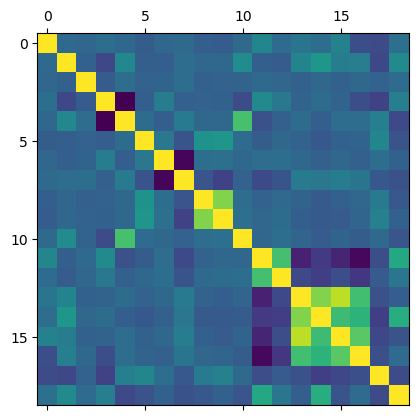

In [22]:
plt.matshow(df.corr())
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14360\196601054.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df_lux.corr(), fignum=f.number) # type of plot


Text(0.5, 1.0, 'Correlation Matrix')

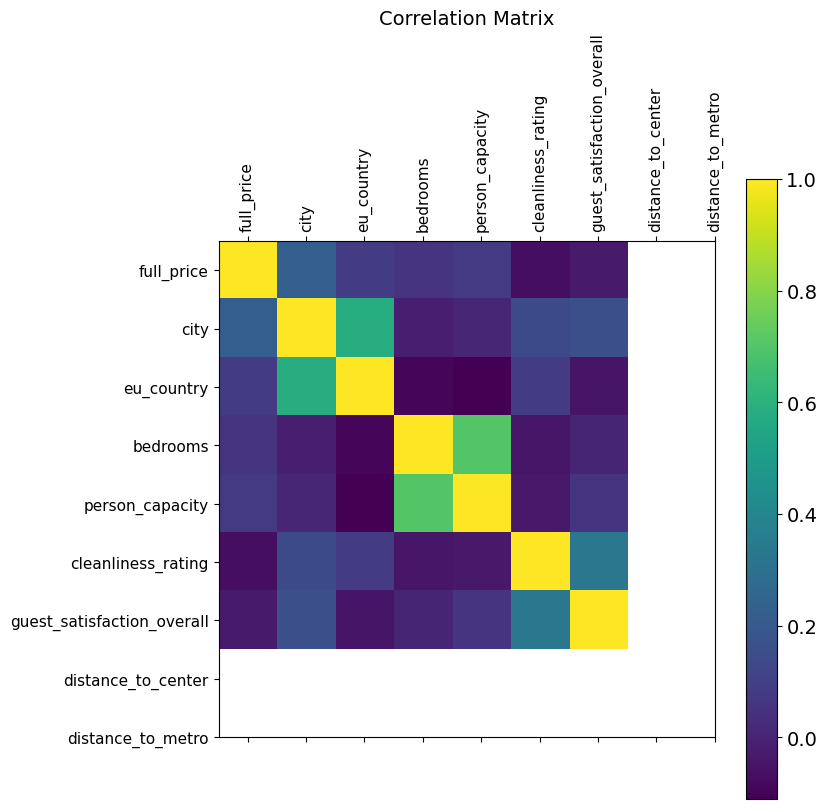

In [23]:
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_lux.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_lux.shape[1]), df_lux.columns, fontsize=11, rotation=90) # x axis labels
plt.yticks(range(df_lux.shape[1]), df_lux.columns, fontsize=11) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14360\502371641.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap(df_lux.corr(), annot = True, ax = ax)


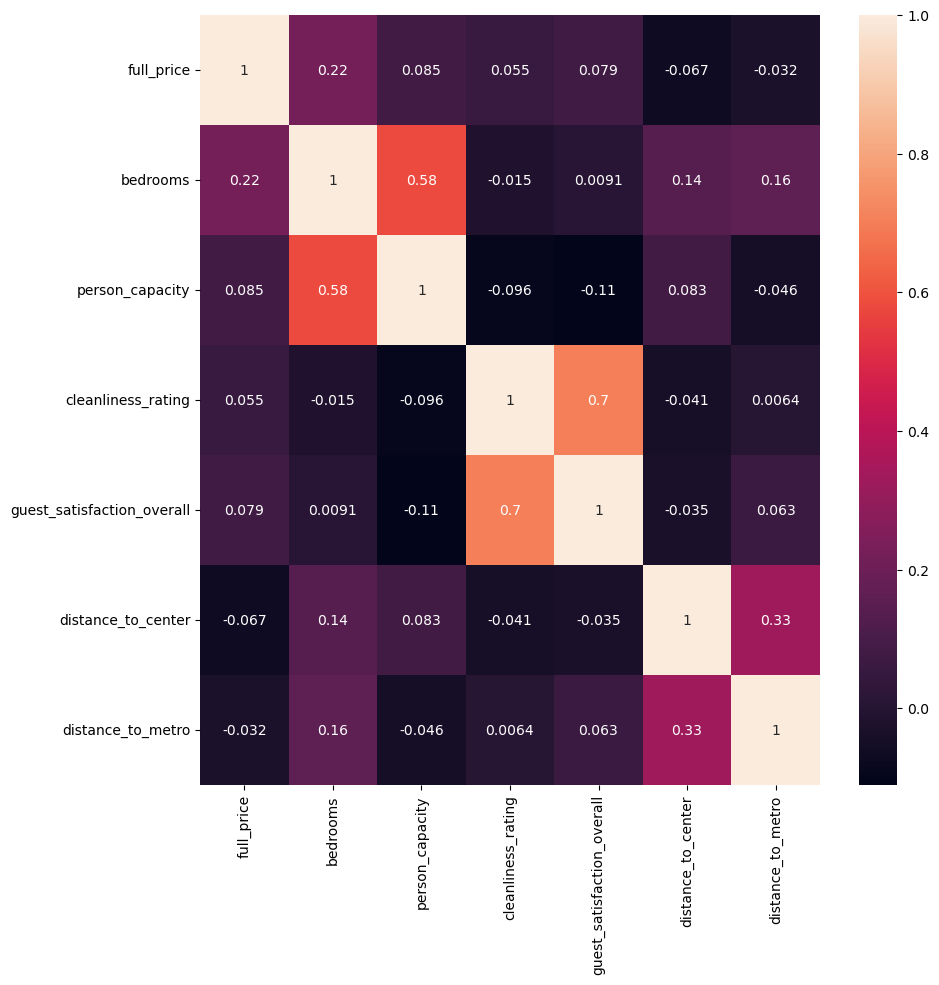

In [24]:
# Creating the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined.
f,ax = plt.subplots(figsize=(10,10))
# Creating the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_lux.corr(), annot = True, ax = ax) 

In [25]:
df_lux_amsterdam = df_lux[df_lux ['city'] == "amsterdam"] 

In [26]:
df_lux_amsterdam.corr()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14360\4023020272.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_lux_amsterdam.corr()


,full_price,bedrooms,person_capacity,cleanliness_rating,guest_satisfaction_overall,distance_to_center,distance_to_metro
full_price,1.000000,0.262593,0.263717,0.070163,0.092151,-0.216707,-0.139436
bedrooms,0.262593,1.000000,0.573413,0.033084,0.087019,0.286886,0.166729
person_capacity,0.263717,0.573413,1.000000,-0.025813,-0.008249,0.145125,0.076351
cleanliness_rating,0.070163,0.033084,-0.025813,1.000000,0.743623,-0.022254,0.021250
guest_satisfaction_overall,0.092151,0.087019,-0.008249,0.743623,1.000000,-0.005858,0.013232
distance_to_center,-0.216707,0.286886,0.145125,-0.022254,-0.005858,1.000000,0.370492
distance_to_metro,-0.139436,0.166729,0.076351,0.021250,0.013232,0.370492,1.000000


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14360\2175926287.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap(df_lux_amsterdam.corr(), annot = True, ax = ax)


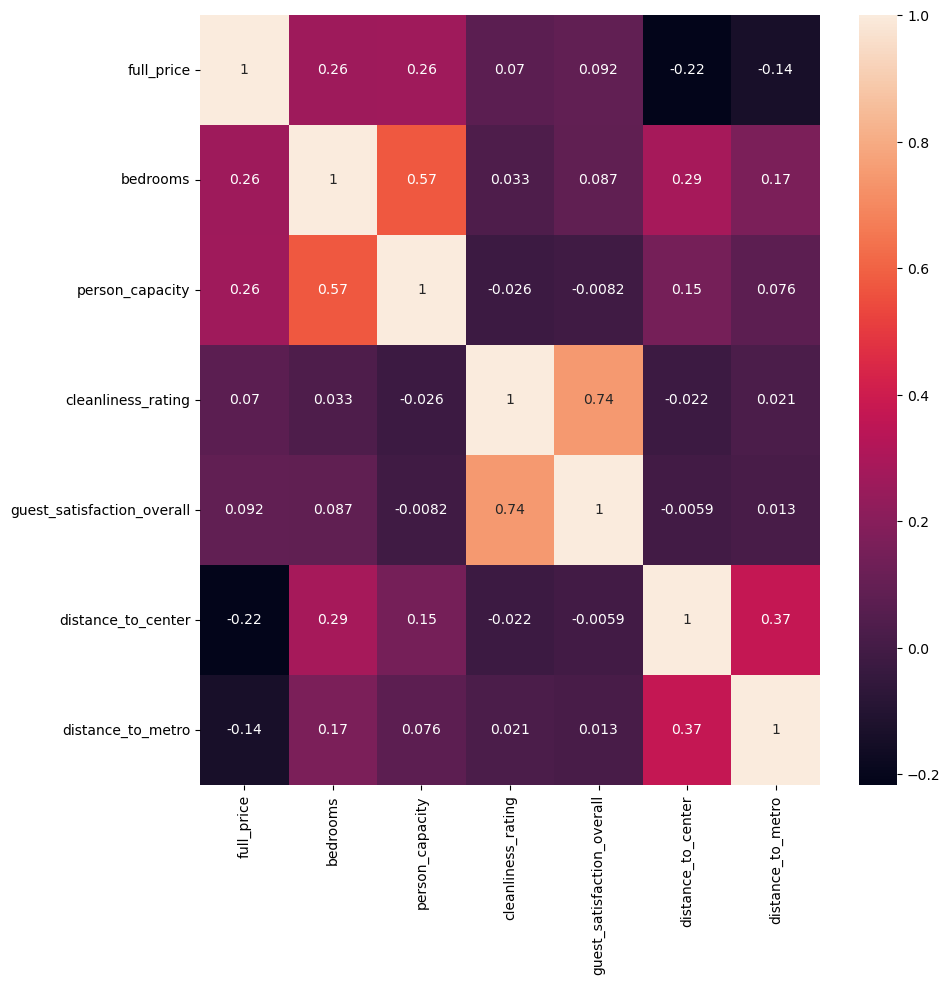

In [27]:
# Creating the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined.
f,ax = plt.subplots(figsize=(10,10))
# Creating the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_lux_amsterdam.corr(), annot = True, ax = ax) 

In [28]:
df_lux_athens = df_lux[df_lux ['city'] == "athens"] 

In [29]:
df_lux_athens.corr()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14360\2627458174.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_lux_athens.corr()


,full_price,bedrooms,person_capacity,cleanliness_rating,guest_satisfaction_overall,distance_to_center,distance_to_metro
full_price,1.000000,0.412804,0.154123,-0.201477,-0.230477,-0.254237,0.065814
bedrooms,0.412804,1.000000,0.582435,-0.484307,-0.575827,-0.538577,0.358067
person_capacity,0.154123,0.582435,1.000000,-0.257153,-0.286989,-0.240920,0.225986
cleanliness_rating,-0.201477,-0.484307,-0.257153,1.000000,0.962380,0.478906,0.288913
guest_satisfaction_overall,-0.230477,-0.575827,-0.286989,0.962380,1.000000,0.408919,0.259973
distance_to_center,-0.254237,-0.538577,-0.240920,0.478906,0.408919,1.000000,-0.328436
distance_to_metro,0.065814,0.358067,0.225986,0.288913,0.259973,-0.328436,1.000000


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14360\3373544991.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap(df_lux_athens.corr(), annot = True, ax = ax)


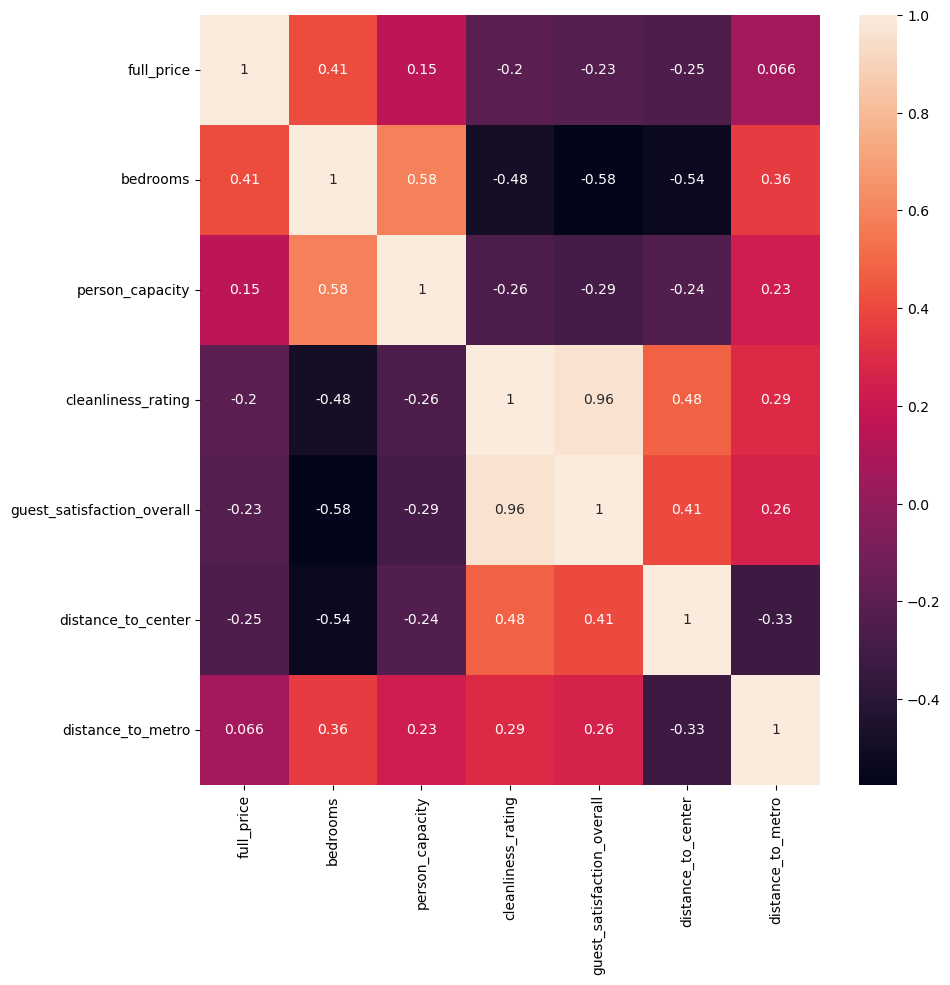

In [30]:
f,ax = plt.subplots(figsize=(10,10))

corr = sns.heatmap(df_lux_athens.corr(), annot = True, ax = ax) 

In [31]:
df_lux_barcelona = df_lux[df_lux ['city'] == "barcelona"] 

In [32]:
df_lux_barcelona.corr()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14360\196425598.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_lux_barcelona.corr()


,full_price,bedrooms,person_capacity,cleanliness_rating,guest_satisfaction_overall,distance_to_center,distance_to_metro
full_price,1.000000,0.285769,0.138254,0.105236,0.163626,0.075011,-0.044011
bedrooms,0.285769,1.000000,0.622010,-0.081558,-0.056217,0.191262,0.054363
person_capacity,0.138254,0.622010,1.000000,-0.192121,-0.170140,0.150681,0.009462
cleanliness_rating,0.105236,-0.081558,-0.192121,1.000000,0.777194,-0.193359,0.009978
guest_satisfaction_overall,0.163626,-0.056217,-0.170140,0.777194,1.000000,-0.237476,0.086297
distance_to_center,0.075011,0.191262,0.150681,-0.193359,-0.237476,1.000000,0.322607
distance_to_metro,-0.044011,0.054363,0.009462,0.009978,0.086297,0.322607,1.000000


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14360\62363108.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap(df_lux_barcelona.corr(), annot = True, ax = ax)


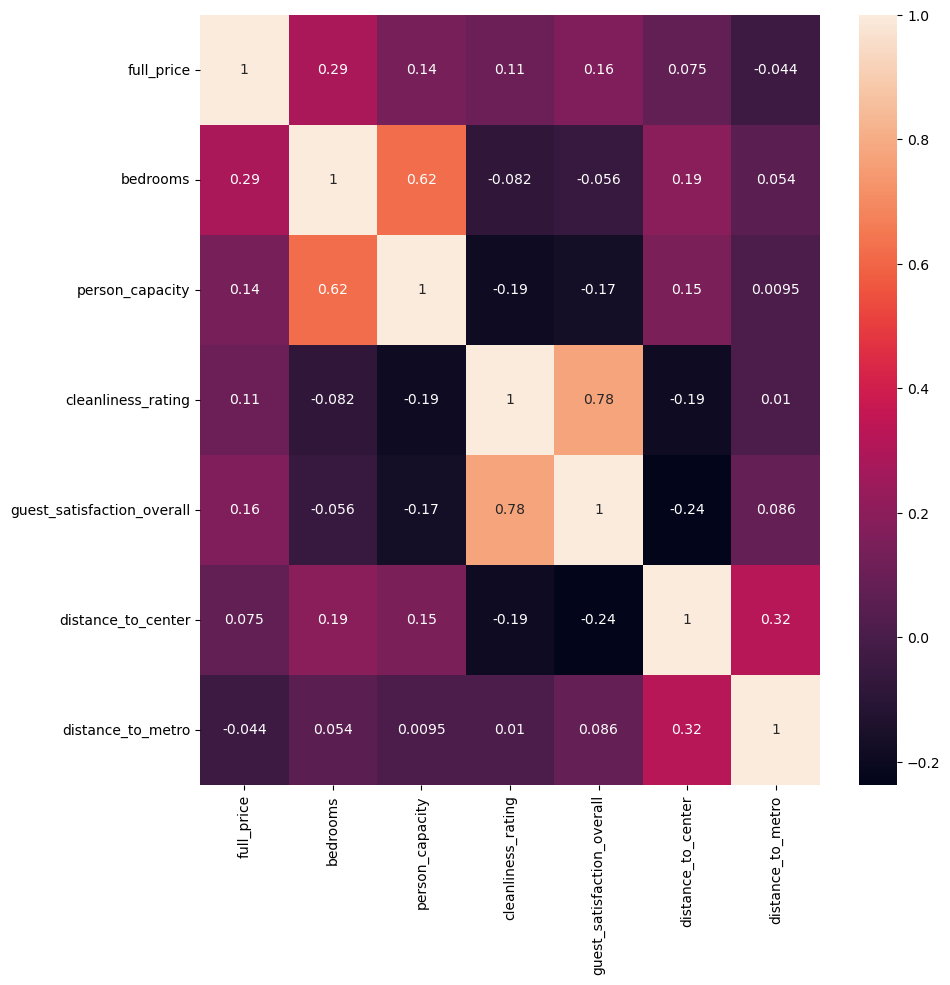

In [33]:
f,ax = plt.subplots(figsize=(10,10))

corr = sns.heatmap(df_lux_barcelona.corr(), annot = True, ax = ax) 

In [34]:
df_lux_berlin = df_lux[df_lux ['city'] == "berlin"] 

In [35]:
df_lux_berlin.corr()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14360\44724687.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_lux_berlin.corr()


,full_price,bedrooms,person_capacity,cleanliness_rating,guest_satisfaction_overall,distance_to_center,distance_to_metro
full_price,1.000000,0.051538,-0.165775,-0.067941,-0.115303,-0.044129,0.021953
bedrooms,0.051538,1.000000,0.516636,-0.180096,-0.075758,0.070574,-0.047222
person_capacity,-0.165775,0.516636,1.000000,-0.238868,-0.241255,0.003689,0.005797
cleanliness_rating,-0.067941,-0.180096,-0.238868,1.000000,0.591492,-0.074025,0.085060
guest_satisfaction_overall,-0.115303,-0.075758,-0.241255,0.591492,1.000000,-0.009175,0.057331
distance_to_center,-0.044129,0.070574,0.003689,-0.074025,-0.009175,1.000000,0.648232
distance_to_metro,0.021953,-0.047222,0.005797,0.085060,0.057331,0.648232,1.000000


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14360\148767627.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap(df_lux_berlin.corr(), annot = True, ax = ax)


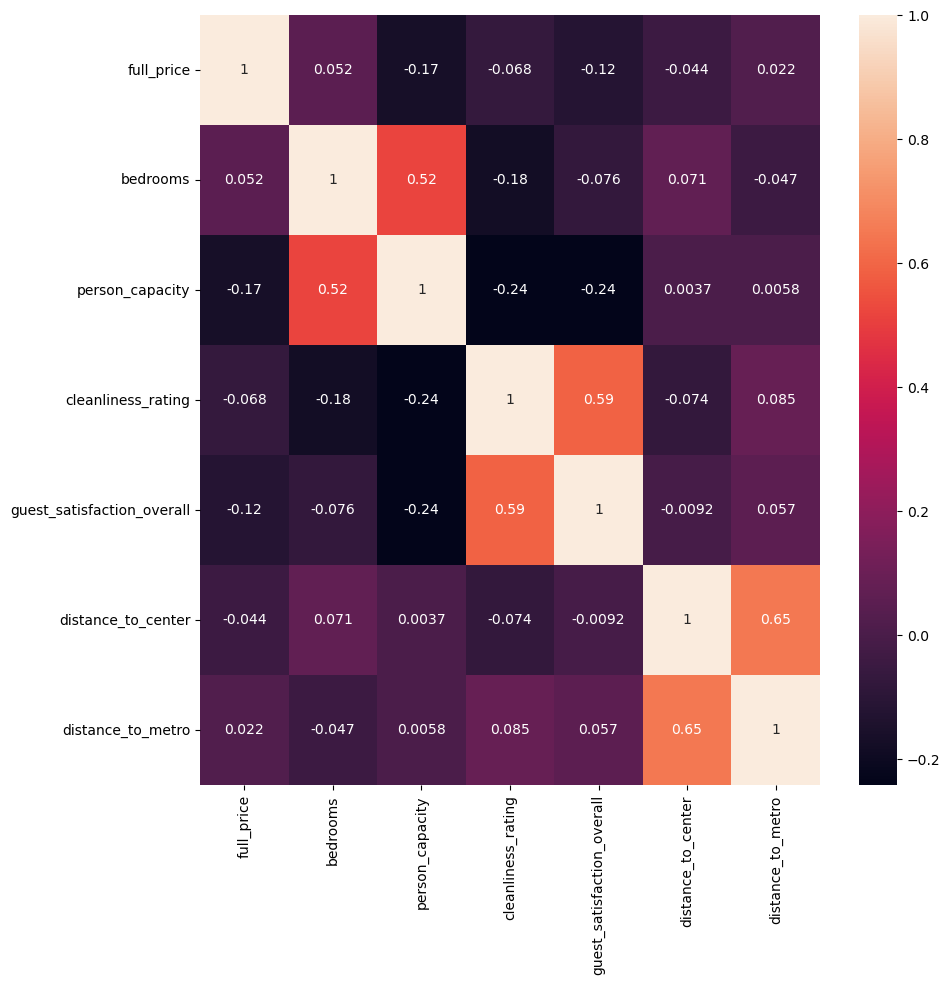

In [36]:
f,ax = plt.subplots(figsize=(10,10))

corr = sns.heatmap(df_lux_berlin.corr(), annot = True, ax = ax) 

In [37]:
df_lux_budapest = df_lux[df_lux ['city'] == "budapest"] 

In [38]:
df_lux_budapest.corr()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14360\3586066987.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_lux_budapest.corr()


,full_price,bedrooms,person_capacity,cleanliness_rating,guest_satisfaction_overall,distance_to_center,distance_to_metro
full_price,1.000000,0.173646,0.087247,0.112023,0.170865,0.338970,-0.073400
bedrooms,0.173646,1.000000,0.730844,0.037864,0.022838,-0.236307,-0.306274
person_capacity,0.087247,0.730844,1.000000,-0.202959,-0.109245,-0.277187,-0.474830
cleanliness_rating,0.112023,0.037864,-0.202959,1.000000,0.872397,-0.341771,0.057453
guest_satisfaction_overall,0.170865,0.022838,-0.109245,0.872397,1.000000,-0.202721,0.206057
distance_to_center,0.338970,-0.236307,-0.277187,-0.341771,-0.202721,1.000000,0.520717
distance_to_metro,-0.073400,-0.306274,-0.474830,0.057453,0.206057,0.520717,1.000000


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14360\4081717902.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap(df_lux_budapest.corr(), annot = True, ax = ax)


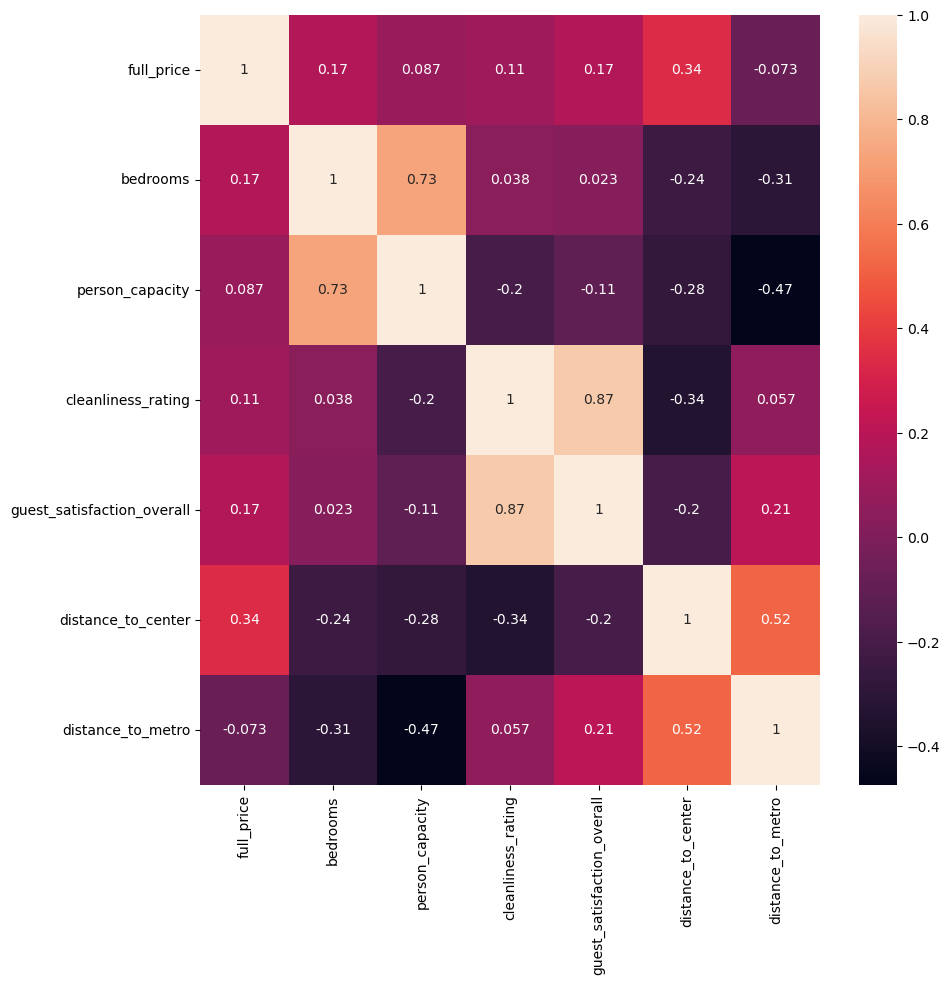

In [39]:
f,ax = plt.subplots(figsize=(10,10))

corr = sns.heatmap(df_lux_budapest.corr(), annot = True, ax = ax) 

In [40]:
df_lux_lisbon = df_lux[df_lux ['city'] == "lisbon"] 

In [41]:
df_lux_lisbon.corr()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14360\548589998.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_lux_lisbon.corr()


,full_price,bedrooms,person_capacity,cleanliness_rating,guest_satisfaction_overall,distance_to_center,distance_to_metro
full_price,1.000000,-0.169604,-0.445344,0.031816,0.055584,0.489631,0.340069
bedrooms,-0.169604,1.000000,0.636373,-0.015371,-0.261123,-0.117499,0.366388
person_capacity,-0.445344,0.636373,1.000000,-0.196289,-0.308346,-0.493486,0.078583
cleanliness_rating,0.031816,-0.015371,-0.196289,1.000000,0.733419,-0.080495,0.054262
guest_satisfaction_overall,0.055584,-0.261123,-0.308346,0.733419,1.000000,-0.115207,-0.254747
distance_to_center,0.489631,-0.117499,-0.493486,-0.080495,-0.115207,1.000000,0.347908
distance_to_metro,0.340069,0.366388,0.078583,0.054262,-0.254747,0.347908,1.000000


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14360\215575191.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap(df_lux_lisbon.corr(), annot = True, ax = ax)


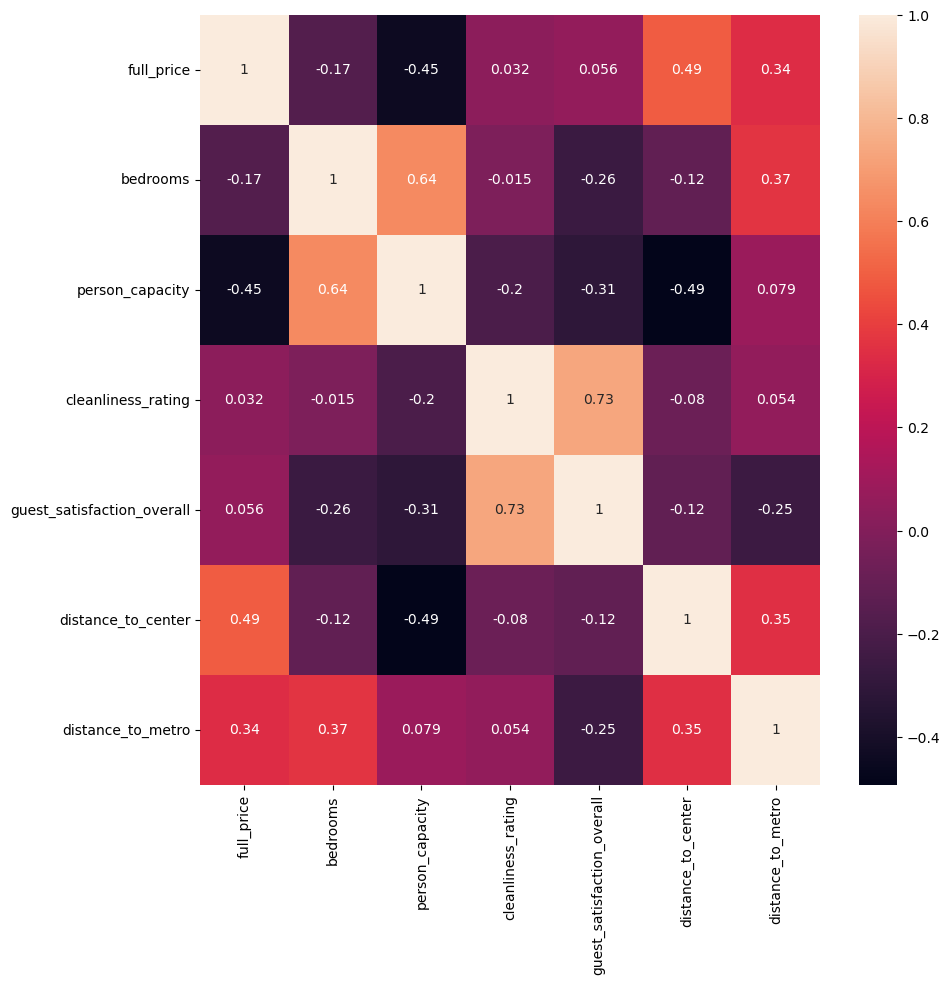

In [42]:
f,ax = plt.subplots(figsize=(10,10))

corr = sns.heatmap(df_lux_lisbon.corr(), annot = True, ax = ax) 

In [43]:
df_lux_london = df_lux[df_lux ['city'] == "london"] 

In [44]:
df_lux_london.corr()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14360\3199395888.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_lux_london.corr()


,full_price,bedrooms,person_capacity,cleanliness_rating,guest_satisfaction_overall,distance_to_center,distance_to_metro
full_price,1.000000,0.236551,0.115835,0.023014,0.054803,-0.118480,-0.062623
bedrooms,0.236551,1.000000,0.657873,-0.031928,-0.006902,0.261960,0.202369
person_capacity,0.115835,0.657873,1.000000,-0.116241,-0.087797,0.161784,0.077161
cleanliness_rating,0.023014,-0.031928,-0.116241,1.000000,0.699279,-0.002760,-0.021766
guest_satisfaction_overall,0.054803,-0.006902,-0.087797,0.699279,1.000000,0.034107,0.034246
distance_to_center,-0.118480,0.261960,0.161784,-0.002760,0.034107,1.000000,0.558511
distance_to_metro,-0.062623,0.202369,0.077161,-0.021766,0.034246,0.558511,1.000000


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14360\4021408169.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap(df_lux_london.corr(), annot = True, ax = ax)


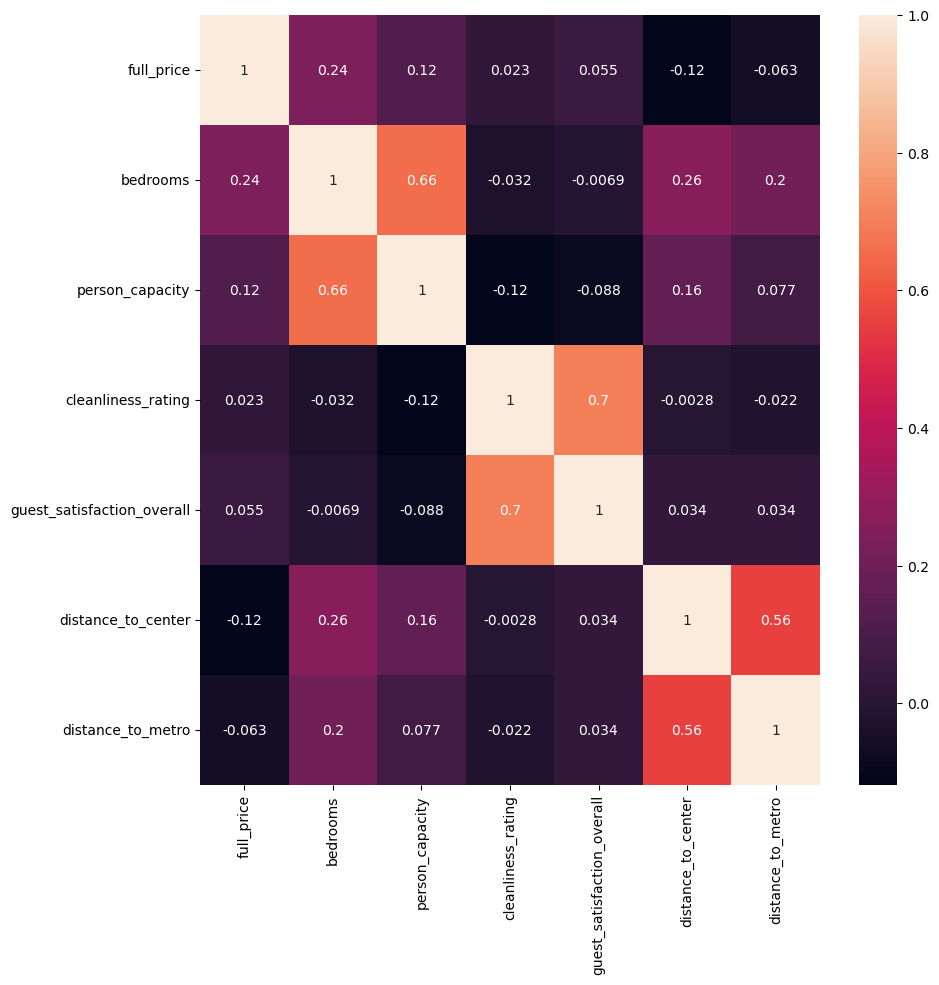

In [45]:
f,ax = plt.subplots(figsize=(10,10))

corr = sns.heatmap(df_lux_london.corr(), annot = True, ax = ax) 

In [46]:
df_lux_paris = df_lux[df_lux ['city'] == "paris"] 

In [47]:
df_lux_paris.corr()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14360\2100306621.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_lux_paris.corr()


,full_price,bedrooms,person_capacity,cleanliness_rating,guest_satisfaction_overall,distance_to_center,distance_to_metro
full_price,1.000000,0.297259,0.148746,0.134823,0.122266,0.041367,-0.007773
bedrooms,0.297259,1.000000,0.554092,0.010707,0.033989,0.016827,-0.039516
person_capacity,0.148746,0.554092,1.000000,-0.037496,-0.091117,-0.050300,-0.000964
cleanliness_rating,0.134823,0.010707,-0.037496,1.000000,0.655869,-0.019242,0.014289
guest_satisfaction_overall,0.122266,0.033989,-0.091117,0.655869,1.000000,0.008849,0.047244
distance_to_center,0.041367,0.016827,-0.050300,-0.019242,0.008849,1.000000,0.256794
distance_to_metro,-0.007773,-0.039516,-0.000964,0.014289,0.047244,0.256794,1.000000


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14360\3844257560.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap(df_lux_paris.corr(), annot = True, ax = ax)


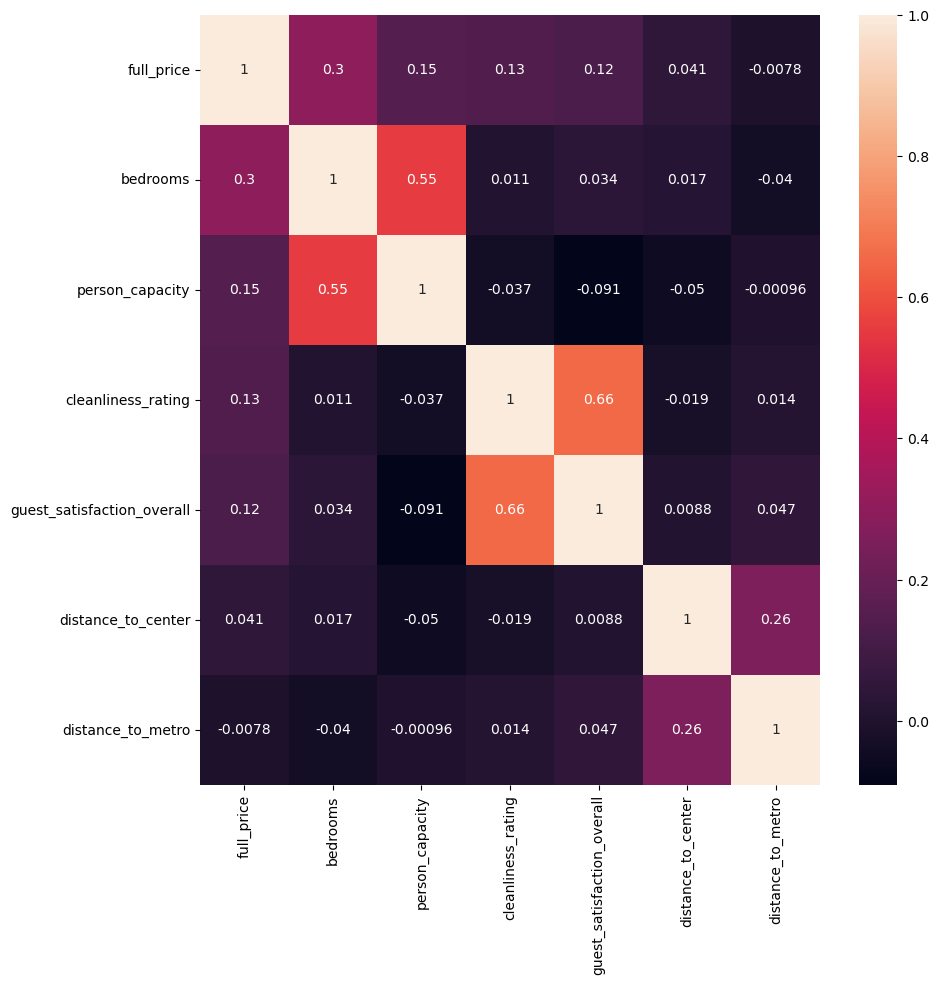

In [48]:
f,ax = plt.subplots(figsize=(10,10))

corr = sns.heatmap(df_lux_paris.corr(), annot = True, ax = ax) 

In [49]:
df_lux_rome = df_lux[df_lux ['city'] == "rome"] 

In [50]:
df_lux_rome.corr()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14360\1464361059.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_lux_rome.corr()


,full_price,bedrooms,person_capacity,cleanliness_rating,guest_satisfaction_overall,distance_to_center,distance_to_metro
full_price,1.000000,-0.171759,-0.237630,-0.209533,-0.097105,-0.122852,-0.331261
bedrooms,-0.171759,1.000000,0.774710,-0.012851,0.133184,0.054866,0.242588
person_capacity,-0.237630,0.774710,1.000000,0.000944,0.223240,-0.072390,0.257148
cleanliness_rating,-0.209533,-0.012851,0.000944,1.000000,0.762416,-0.025245,-0.130428
guest_satisfaction_overall,-0.097105,0.133184,0.223240,0.762416,1.000000,-0.233267,-0.122425
distance_to_center,-0.122852,0.054866,-0.072390,-0.025245,-0.233267,1.000000,0.693404
distance_to_metro,-0.331261,0.242588,0.257148,-0.130428,-0.122425,0.693404,1.000000


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14360\4133409505.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap(df_lux_rome.corr(), annot = True, ax = ax)


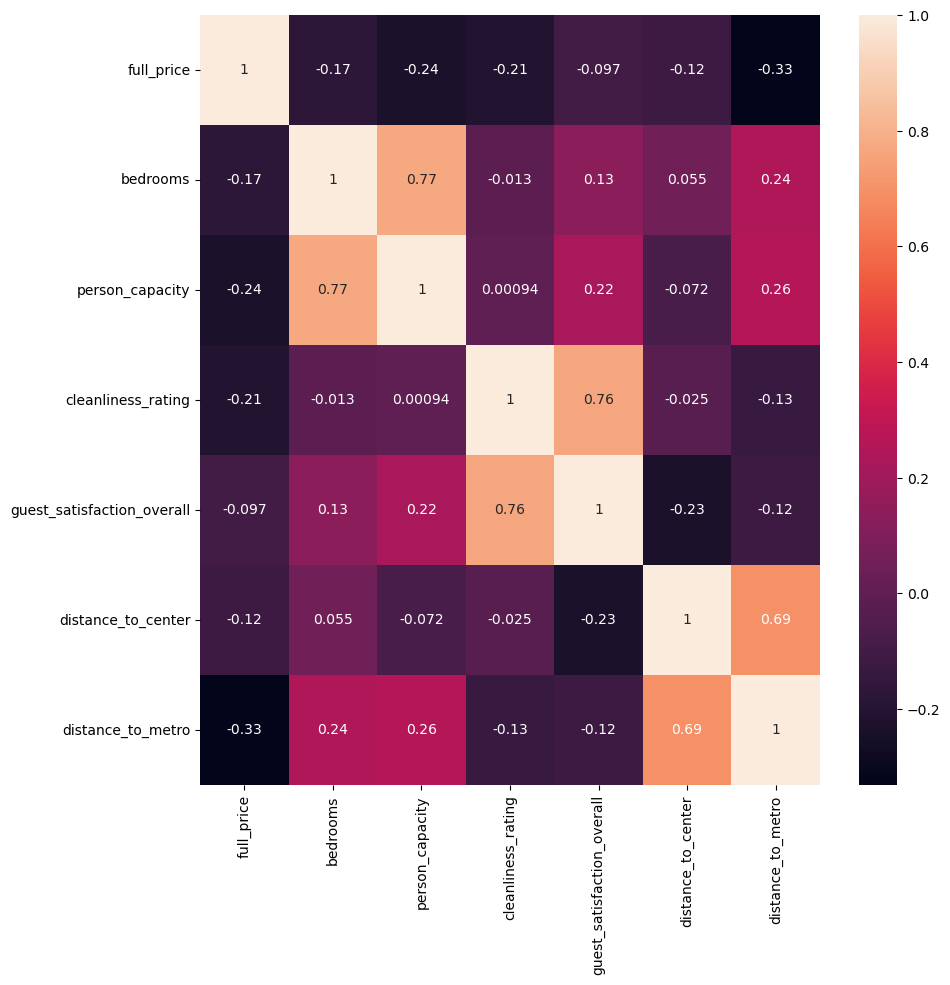

In [51]:
f,ax = plt.subplots(figsize=(10,10))

corr = sns.heatmap(df_lux_rome.corr(), annot = True, ax = ax) 

In [55]:
df_lux_vienna = df_lux[df_lux ['city'] == "vienna"] 

In [56]:
df_lux_vienna.corr()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14360\3014342649.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_lux_vienna.corr()


,full_price,bedrooms,person_capacity,cleanliness_rating,guest_satisfaction_overall,distance_to_center,distance_to_metro
full_price,1.000000,-0.051200,-0.035730,0.185013,0.232497,-0.248831,-0.214465
bedrooms,-0.051200,1.000000,0.840564,-0.185893,0.076993,0.050236,-0.041017
person_capacity,-0.035730,0.840564,1.000000,-0.337024,0.009063,-0.038837,-0.150326
cleanliness_rating,0.185013,-0.185893,-0.337024,1.000000,0.132778,-0.226224,-0.246767
guest_satisfaction_overall,0.232497,0.076993,0.009063,0.132778,1.000000,0.058450,-0.025349
distance_to_center,-0.248831,0.050236,-0.038837,-0.226224,0.058450,1.000000,0.893151
distance_to_metro,-0.214465,-0.041017,-0.150326,-0.246767,-0.025349,0.893151,1.000000


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14360\3552115351.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap(df_lux_vienna.corr(), annot = True, ax = ax)


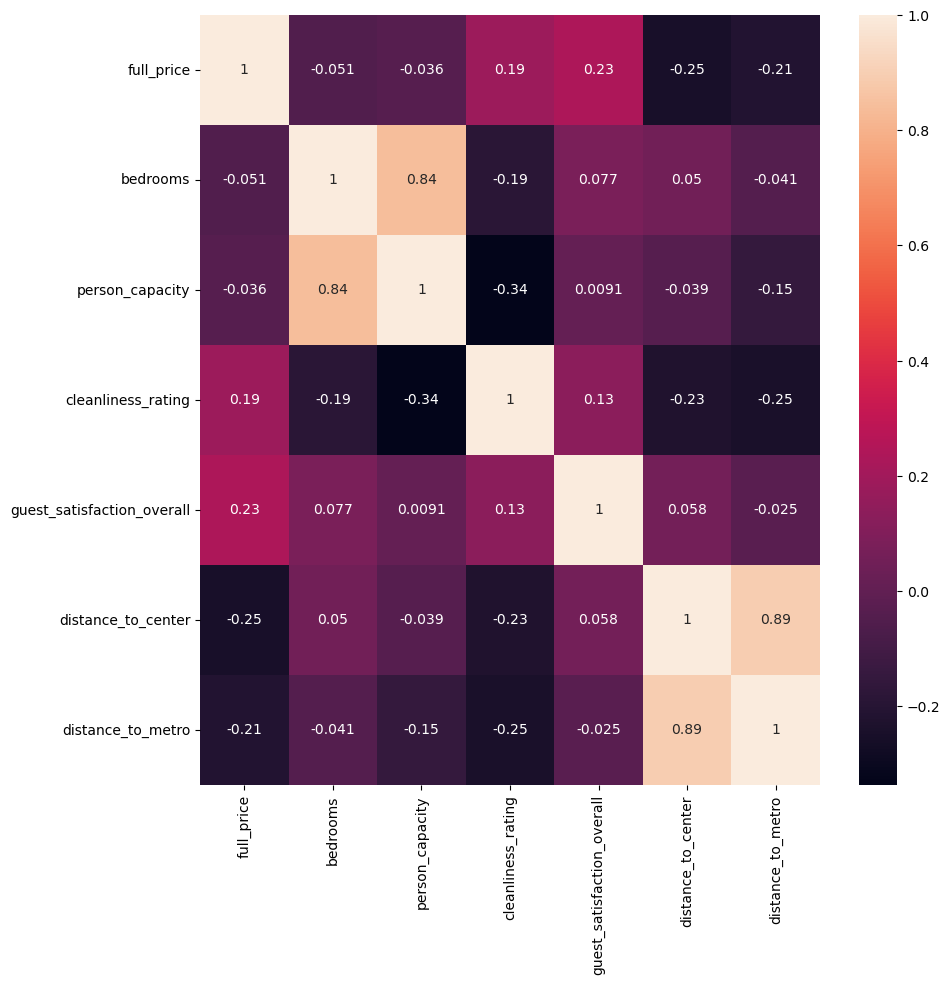

In [57]:
f,ax = plt.subplots(figsize=(10,10))

corr = sns.heatmap(df_lux_vienna.corr(), annot = True, ax = ax) 

In [ ]:
df_lux.to_csv(os.path.join(path,'AirBnB_lux_set.csv'))

In [58]:
df_rel.to_csv(os.path.join(path,'AirBnB_rel_set.csv'))

In [62]:
df_avg_price= pd.read_excel(os.path.join(path, 'avg price per meter.xlsx'))

In [63]:
df_avg_price.head()

,city,city center,outskirts,avg
0,amsterdam,7389,4953,6171.0
1,athens,2676,2653,2664.5
2,berlin,8343,5794,7068.5
3,budapest,3629,2493,3061.0
4,barcelona,5073,3181,4127.0


In [65]:
df_avg_price.to_csv(os.path.join(path,'AirBnB_avg_price_per_meter.csv'))